In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [2]:
df=pd.read_csv("train_agriculture.csv")
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [3]:
atest=pd.read_csv("test_agriculture.csv")
atest.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [5]:
atest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [6]:
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [7]:
atest.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [8]:
cf=[]
nf=[] 
for fea in df.columns:
    if df[fea].dtype == 'O':
            cf.append(fea)
    else:
            nf.append(fea)
print(cf)
print('\n',nf)

['ID']

 ['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit', 'Season', 'Crop_Damage']


In [9]:
#filling missing data with imputation for numerical data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values  = np.nan, strategy = 'mean')
df['Number_Weeks_Used']=imp.fit_transform(df['Number_Weeks_Used'].values.reshape(-1,1))
atest["Number_Weeks_Used"]=imp.fit_transform(atest['Number_Weeks_Used'].values.reshape(-1,1))


In [10]:
print(df.isnull().sum(),'\n')
print(atest.isnull().sum())

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64 

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64


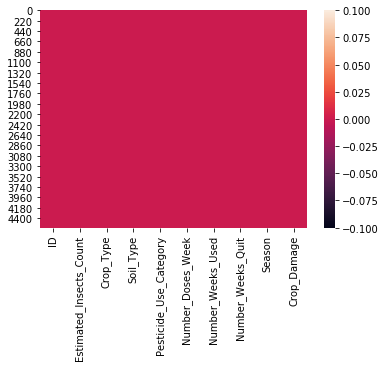

In [11]:
sns.heatmap(df.isnull())

# Statistics Summary

In [12]:
df.describe() 

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


# Data Visualisation

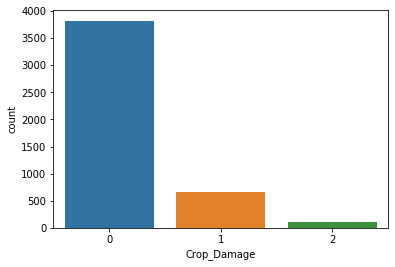

In [13]:
#univariate analysis
sns.countplot(df['Crop_Damage'])
plt.show()

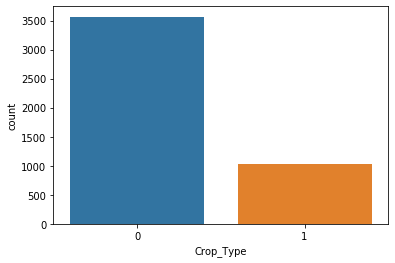

In [14]:
sns.countplot(df['Crop_Type'])
plt.show()

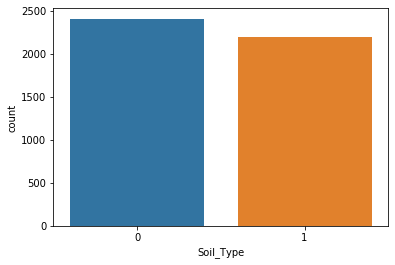

In [15]:
sns.countplot(df['Soil_Type'])
plt.show()

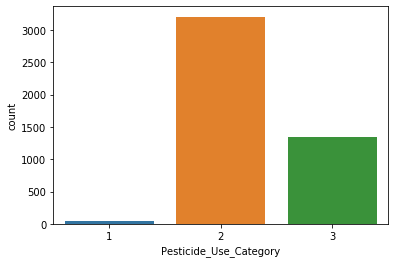

In [16]:
sns.countplot(df['Pesticide_Use_Category'])
plt.show()

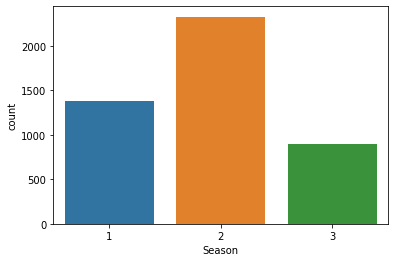

In [17]:
sns.countplot(df['Season'])
plt.show()

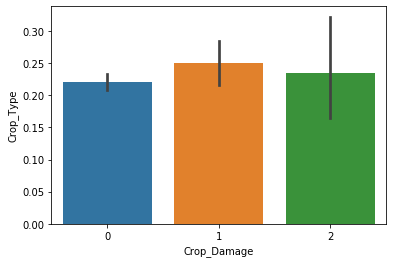

In [18]:
#bivariate analysis
sns.barplot(x='Crop_Damage',y='Crop_Type',data=df) 
plt.show()

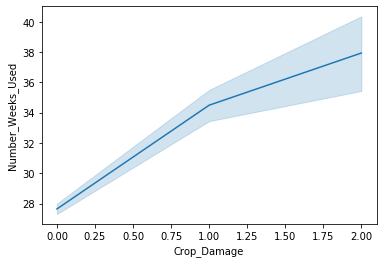

In [19]:
sns.lineplot(x='Crop_Damage',y='Number_Weeks_Used',data=df) 
plt.show()

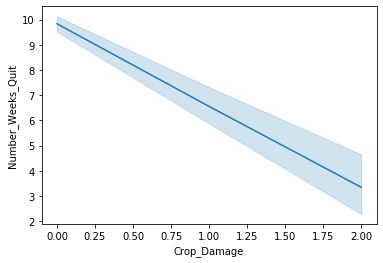

In [20]:
sns.lineplot(x='Crop_Damage',y='Number_Weeks_Quit',data=df) 
plt.show()

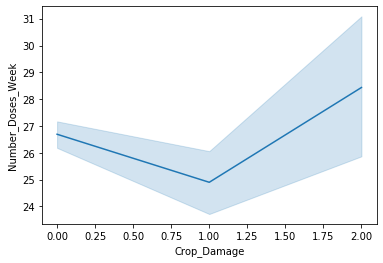

In [21]:
sns.lineplot(x='Crop_Damage',y='Number_Doses_Week',data=df) 
plt.show()

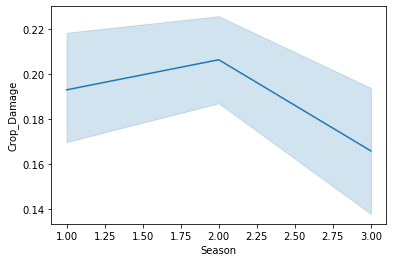

In [22]:
sns.lineplot(x='Season',y='Crop_Damage',data=df) 
plt.show()

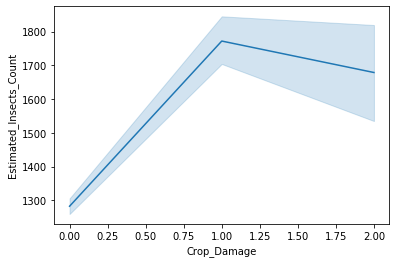

In [23]:
sns.lineplot(x='Crop_Damage',y='Estimated_Insects_Count',data=df) 
plt.show()

In [24]:
#correlation matrix
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.427904,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002128,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093539,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.368106,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099705,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.427904,-0.002128,-0.093539,0.368106,0.099705,1.000000,-0.446200,-0.010590,0.231925
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.446200,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010590,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231925,-0.152918,-0.016196,1.000000


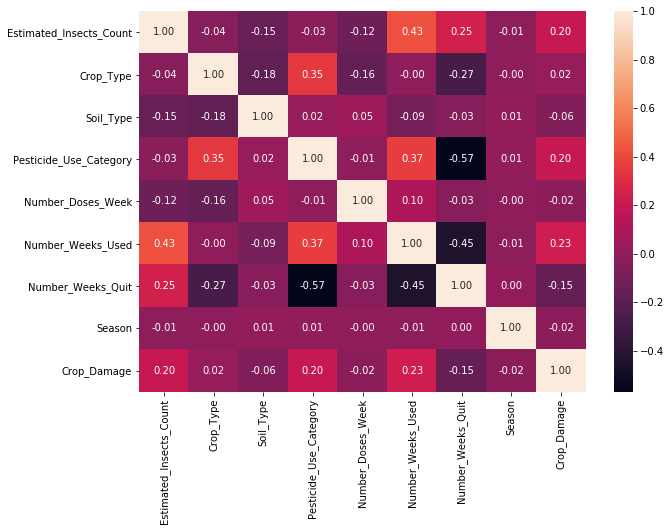

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

# Data Cleaning

In [26]:
#changing categorial object into numeric form
df['ID'] = df['ID'].astype('category').cat.codes
atest['ID'] = atest['ID'].astype('category').cat.codes


df['Crop_Damage_encoded'] = df['Crop_Damage'].map( {0:1, 1:2, 2:3})
df['Crop_Damage']=df['Crop_Damage_encoded']
df=df.drop(columns=['Crop_Damage_encoded'], axis=1)

In [27]:
classes_q = sorted(df.Crop_Damage.unique())
classes_q

[1, 2, 3]

In [28]:
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0,188,1,0,1,0,0.000000,0,1,1
1,1,209,1,0,1,0,0.000000,0,2,2
2,2,257,1,0,1,0,0.000000,0,2,2
3,3,257,1,1,1,0,0.000000,0,2,2
4,4,342,1,0,1,0,0.000000,0,2,2
...,...,...,...,...,...,...,...,...,...,...
4594,4594,2138,0,1,2,20,28.891027,1,1,2
4595,4595,2139,0,1,2,30,47.000000,2,1,2
4596,4596,2267,0,1,2,10,7.000000,27,2,1
4597,4597,2267,0,1,2,10,20.000000,24,2,1


<Figure size 720x360 with 0 Axes>

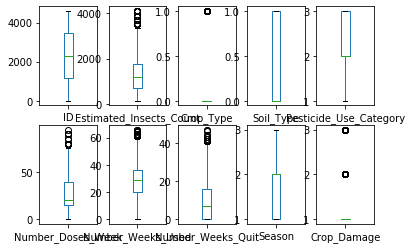

In [29]:
plt.figure(figsize=(10,5))
df.plot(kind='box',subplots=True,layout=(2,5)) 
plt.show()

In [30]:
from scipy.stats import zscore # removing outliers
z=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z<3).all(axis=1)]
print(df_final.shape)
df=df_final

(4599, 10)
(4370, 10)


In [31]:
y=df["Crop_Damage"]
dfx=df.drop(columns=['Crop_Damage'], axis=1)
y.unique()

array([1, 2], dtype=int64)

In [32]:
dfx.skew()

ID                         0.002956
Estimated_Insects_Count    0.789806
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.753578
Number_Doses_Week          0.711083
Number_Weeks_Used          0.275330
Number_Weeks_Quit          0.813382
Season                     0.141605
dtype: float64

In [33]:
# handling skewness
from scipy.stats import boxcox
for col in dfx.columns:
    if dfx.skew().loc[col]>0.55:
        dfx[col]=np.sqrt(dfx[col])

In [34]:
dfx.skew()

ID                         0.002956
Estimated_Insects_Count    0.179172
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.588515
Number_Doses_Week         -0.097393
Number_Weeks_Used          0.275330
Number_Weeks_Quit          0.006921
Season                     0.141605
dtype: float64

In [35]:
dfx.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,13.711309,1.0,0,1.0,0.0,0.0,0.0,1
1,1,14.456832,1.0,0,1.0,0.0,0.0,0.0,2
2,2,16.031220,1.0,0,1.0,0.0,0.0,0.0,2
3,3,16.031220,1.0,1,1.0,0.0,0.0,0.0,2
4,4,18.493242,1.0,0,1.0,0.0,0.0,0.0,2


In [36]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(dfx)
x=pd.DataFrame(x,columns=dfx.columns)
x.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-1.739765,-1.996164,1.848947,-0.960945,-3.335467,-3.292351,-2.445679,-1.237252,-1.288559
1,-1.739011,-1.925536,1.848947,-0.960945,-3.335467,-3.292351,-2.445679,-1.237252,0.147555
2,-1.738257,-1.776386,1.848947,-0.960945,-3.335467,-3.292351,-2.445679,-1.237252,0.147555
3,-1.737503,-1.776386,1.848947,1.040642,-3.335467,-3.292351,-2.445679,-1.237252,0.147555
4,-1.736749,-1.543144,1.848947,-0.960945,-3.335467,-3.292351,-2.445679,-1.237252,0.147555


# Prediction by classification model¶
As we can see our target label is categorical in nature with three categories so we using classification modeling.

In [37]:
from sklearn import linear_model
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [38]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(2927, 9) (1443, 9)
(2927,) (1443,)


In [39]:
maxrscore=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred= reg.predict(x_test)
    r2s=r2_score(y_test,y_pred)
    if r2s > maxrscore:
        maxrscore=r2s
        fr_state=r_state
print("max r2 score corresponding to ",fr_state," is ",maxrscore)

max r2 score corresponding to  64  is  0.12194398325694067


In [40]:
#GRID SEARCHCV
parameter = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10]}
svc = SVC()
grid = GridSearchCV( estimator=SVC(), param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.kernel)
print(grid.best_params_)
s=grid.best_estimator_.kernel

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
linear
{'C': 1, 'kernel': 'linear'}


In [41]:
#GRID SEARCHCV
parameter = {'n_neighbors':(3,5,7,9,11), 'weights':['uniform','distance']}
knn = KNeighborsClassifier()
grid = GridSearchCV( estimator=knn, param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.n_neighbors)
print(grid.best_estimator_.weights)
print(grid.best_params_)
k=grid.best_estimator_.n_neighbors
w=grid.best_estimator_.weights

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (3, 5, 7, 9, 11),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
11
uniform
{'n_neighbors': 11, 'weights': 'uniform'}


In [42]:
KNN=KNeighborsClassifier(n_neighbors=k,weights=w)
SV=SVC(kernel=s)
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=fr_state)
GNB=GaussianNB()
XGBC=GradientBoostingClassifier()
RFC=RandomForestClassifier()

In [43]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', XGBC))

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')


Accuracy_score =  0.8634788634788635


Cross_Val_Score =  0.654004576659039


roc_auc_score =  nan


classification_report
               precision    recall  f1-score   support

           1       0.88      0.97      0.92      1249
           2       0.48      0.17      0.25       194

    accuracy                           0.86      1443
   macro avg       0.68      0.57      0.59      1443
weighted avg       0.83      0.86      0.83      1443



[[1213   36]
 [ 161   33]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


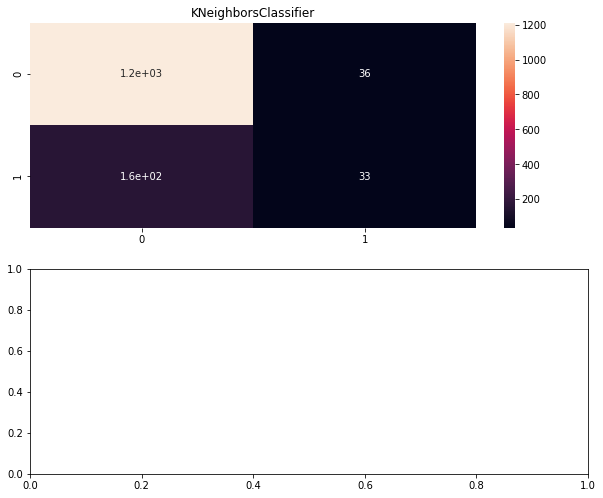

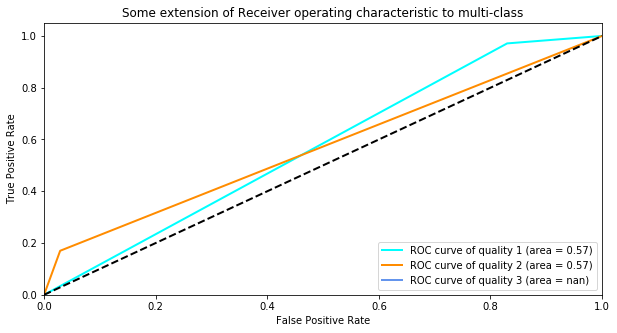




*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy_score =  0.8655578655578655


Cross_Val_Score =  0.8537757437070939


roc_auc_score =  nan


classification_report
               precision    recall  f1-score   support

           1       0.87      1.00      0.93      1249
           2       0.00      0.00      0.00       194

    accuracy                           0.87      1443
   macro avg       0.43      0.50      0.46      1443
weighted avg       0.75      0.87      0.80      1443



[[1249    0]
 [ 194    0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


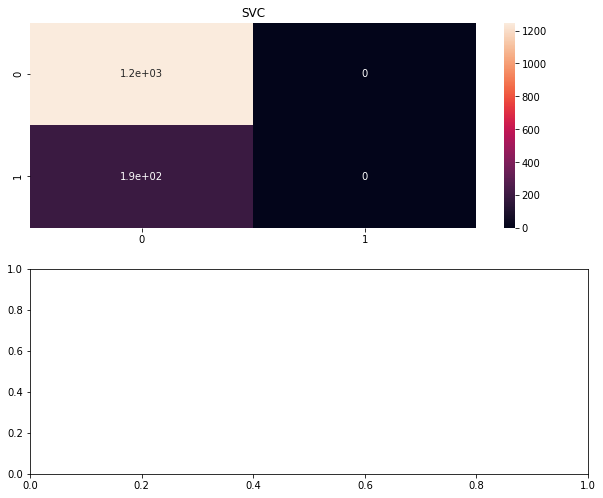

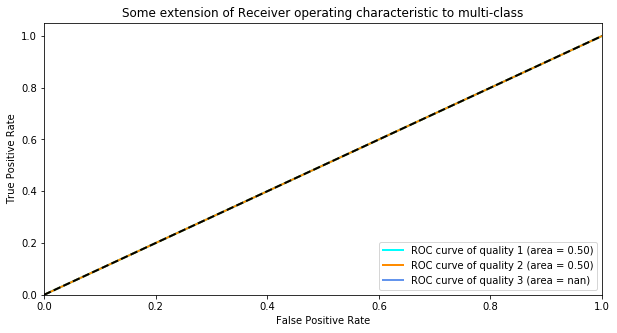




*********************** LogisticRegression ***********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score =  0.8627858627858628


Cross_Val_Score =  0.8279176201372997


roc_auc_score =  nan


classification_report
               precision    recall  f1-score   support

           1       0.87      0.99      0.93      1249
           2       0.42      0.05      0.09       194

    accuracy                           0.86      1443
   macro avg       0.64      0.52      0.51      1443
weighted avg       0.81      0.86      0.81      1443



[[1235   14]
 [ 184   10]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


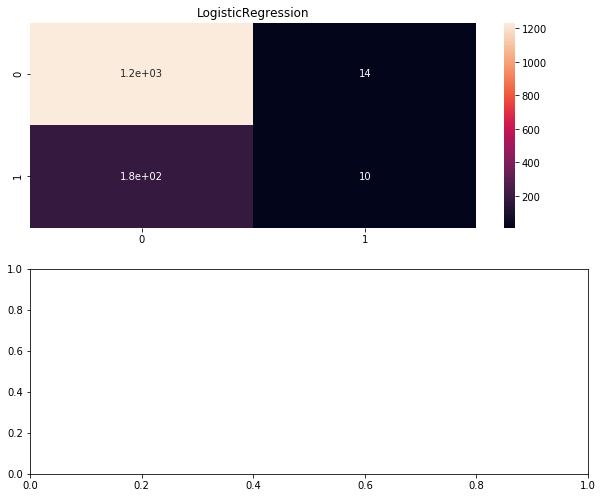

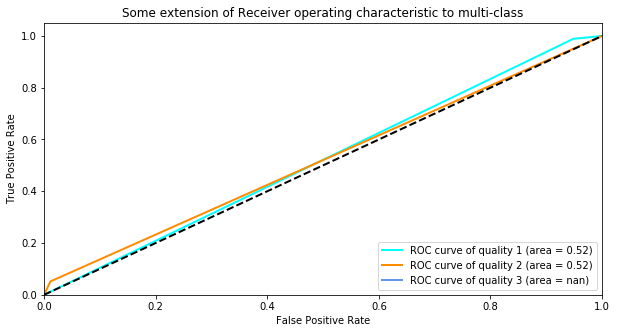




*********************** DecisionTreeClassifier ***********************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=64, splitter='best')


Accuracy_score =  0.8018018018018018


Cross_Val_Score =  0.28695652173913044


roc_auc_score =  nan


classification_report
               precision    recall  f1-score   support

           1       0.90      0.87      0.88      1249
           2       0.31      0.39      0.34       194

    accuracy                           0.80      1443
   macro avg       0.61      0.63      0.61      1443
weighted avg       0.82      0.80      0.81      1443



[[1082  167]
 [ 119   75]]


AxesSubplot(0

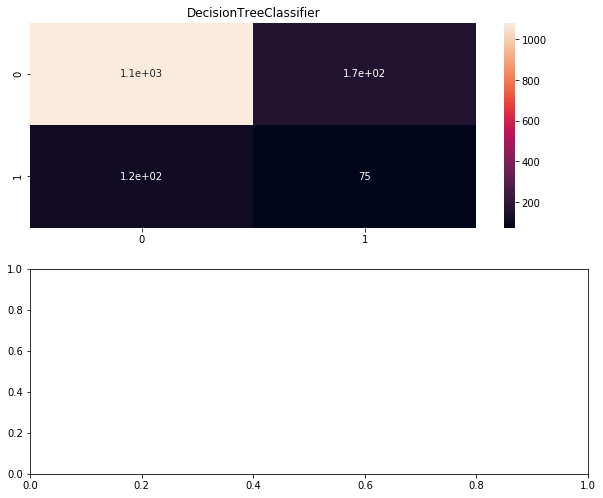

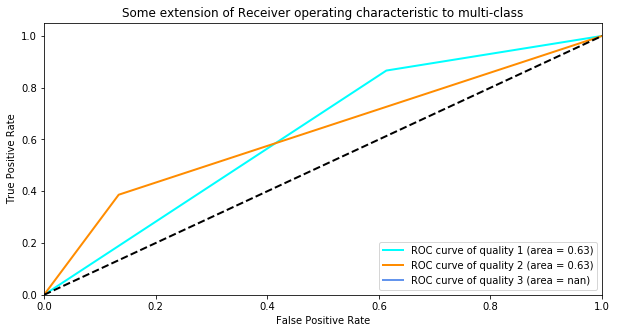




*********************** GaussianNB ***********************


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy_score =  0.8316008316008316


Cross_Val_Score =  0.7585812356979406


roc_auc_score =  nan


classification_report
               precision    recall  f1-score   support

           1       0.90      0.91      0.90      1249
           2       0.37      0.35      0.36       194

    accuracy                           0.83      1443
   macro avg       0.63      0.63      0.63      1443
weighted avg       0.83      0.83      0.83      1443



[[1132  117]
 [ 126   68]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


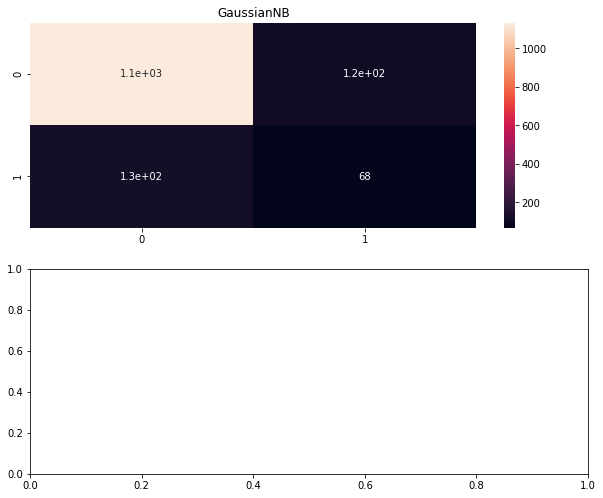

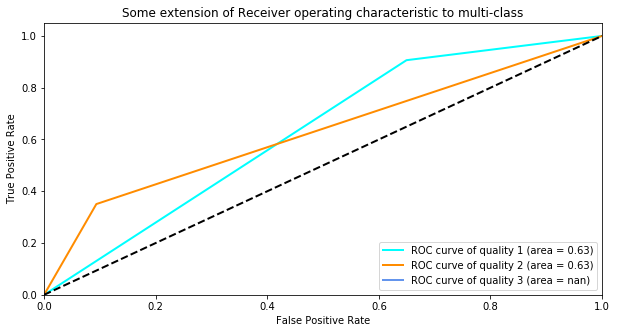




*********************** RandomForestClassifier ***********************


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Accuracy_score =  0.8634788634788635


Cross_Val_Score =  0.41784897025171625


roc_auc_score =  nan


classification_report
               precision    recall  f1-score   support

           1       0.89      0.96      0.92      1249
           2       0.48      0.24      0.32       194

    accuracy                           0.86      1443
   macro avg       0.69      0.

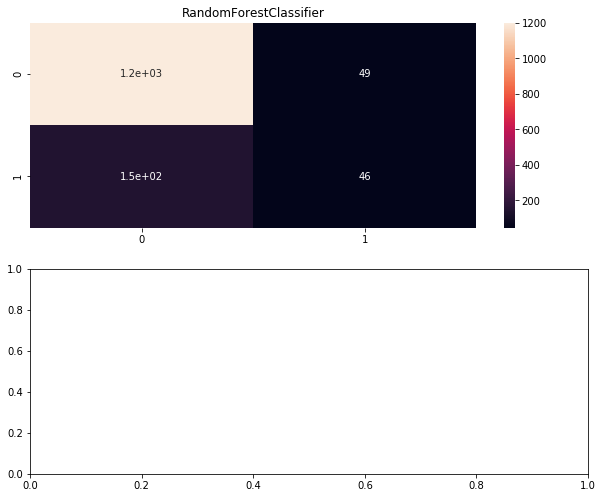

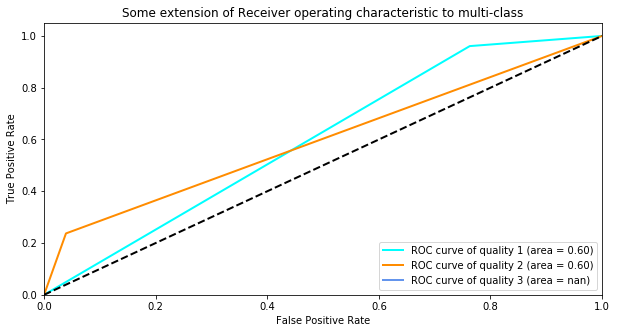




*********************** GradientBoostingClassifier ***********************


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Accuracy_score =  0.8627858627858628


Cross_Val_Score =  0.411441647597254


roc_auc_score =  nan


classification_report
               precision    recall  f1-score   support

           1       0.88      0.97      0.9

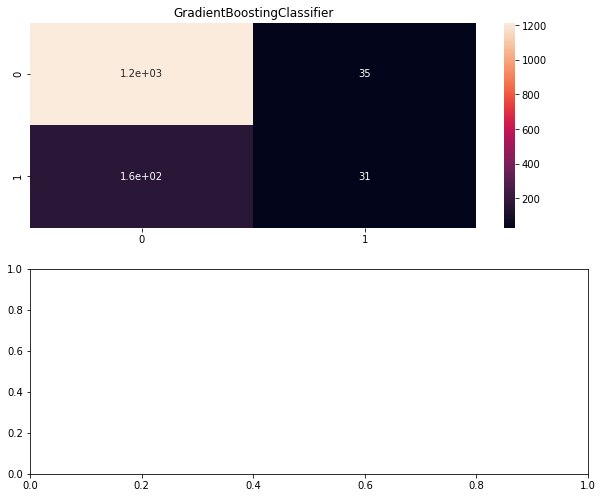

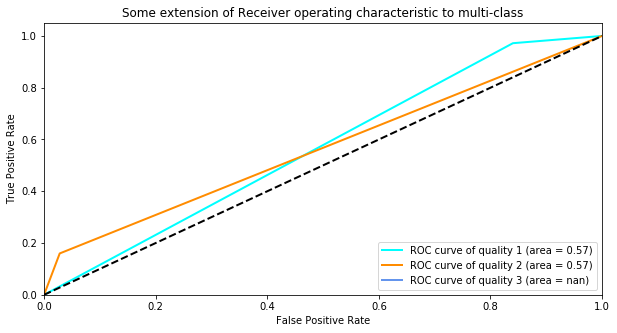

In [45]:
Model = []
score = []
cvs=[]
rocscore=[]

fpr = dict()
tpr = dict()
roc_auc = dict()
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    #For ROC curves we have to binarize lables
    y_test_bin = label_binarize(y_test, classes=classes_q)
    y_pred_bin = label_binarize(pre, classes=classes_q)
    for i in range(len(classes_q)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes_q))]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes_q)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= len(classes_q)

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    #for average of roc_auc
    l=len(roc_auc)
    for i in range(l):
        sroc=sum(roc_auc.values())
    froc=sroc/l
    print ('roc_auc_score = ',froc)
    rocscore.append(froc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.figure(figsize=(10,5))
    
    colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'magenta']
    for i, color in zip(range(len(classes_q)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                   label='ROC curve of quality {0} (area = {1:0.2f})'
                       ''.format(classes_q[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()
    print('\n\n')

In [46]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Rou_auc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Rou_auc_score
0,KNeighborsClassifier,86.347886,65.400458,NaN
1,SVC,86.555787,85.377574,NaN
2,LogisticRegression,86.278586,82.791762,NaN
3,DecisionTreeClassifier,80.180180,28.695652,NaN
4,GaussianNB,83.160083,75.858124,NaN
5,RandomForestClassifier,86.347886,41.784897,NaN
6,GradientBoostingClassifier,86.278586,41.144165,NaN


In [47]:
from sklearn.externals import joblib

In [48]:
joblib.dump(SV,'agriculture.pkl')

['agriculture.pkl']

In [49]:
model=joblib.load('agriculture.pkl')

In [50]:
model.predict(x_test.head())

array([1, 1, 1, 1, 1], dtype=int64)

In [51]:
model.predict(atest)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)